In [27]:
import skimage
import scipy
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import sys
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from skimage import morphology, measure
from skimage.color import label2rgb

In [56]:
data = loadmat('Brain.mat')
T1 = data['T1']
label = data['label']
print(T1.shape)

(362, 434, 10)


In [29]:
#Displaying the T1 images
num_slices = T1.shape[2]  # Since T1.shape[2] is number of slices.
num_rows = 2
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols , figsize=(20, 8))  
for i in range(num_slices):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axs[row_idx, col_idx].imshow(T1[:, :, i], cmap='gray')
    axs[row_idx, col_idx].set_title('Slice {}'.format(i+1))
    axs[row_idx, col_idx].axis('off')
plt.show()

In [30]:
#Displaying the label images
num_slices_label = label.shape[2]  # Since label.shape[2] is also 10
num_rows = 2
num_cols = 5
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 8))  # Adjusting figsize
for i in range(num_slices_label):
    row_idx = i // num_cols
    col_idx = i % num_cols
    im = axs[row_idx, col_idx].imshow(label[:, :, i],cmap='jet')
    axs[row_idx, col_idx].set_title('Slice {}'.format(i+1))
    axs[row_idx, col_idx].axis('off')   
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Label')
plt.show() 

# Task 1

In [31]:
#Checking the pixel values
print(T1[:, :, 0])

[[ 6588.089   6468.3145  6707.863  ...  2515.764   2755.3125  2994.861 ]
 [ 7785.831   7905.6055  7666.057  ...  2994.861   3114.6353  3114.6353]
 [ 8264.928   8145.154   7905.6055 ...  2515.764   2875.0867  2875.0867]
 ...
 [ 7067.1855  6707.863   7186.96   ... 13774.544  14133.866  14493.189 ]
 [ 7666.057   7067.1855  7426.5083 ... 13175.673  14014.093  14253.641 ]
 [ 7186.96    6827.637   6947.4116 ... 11977.93   13175.673  14373.415 ]]


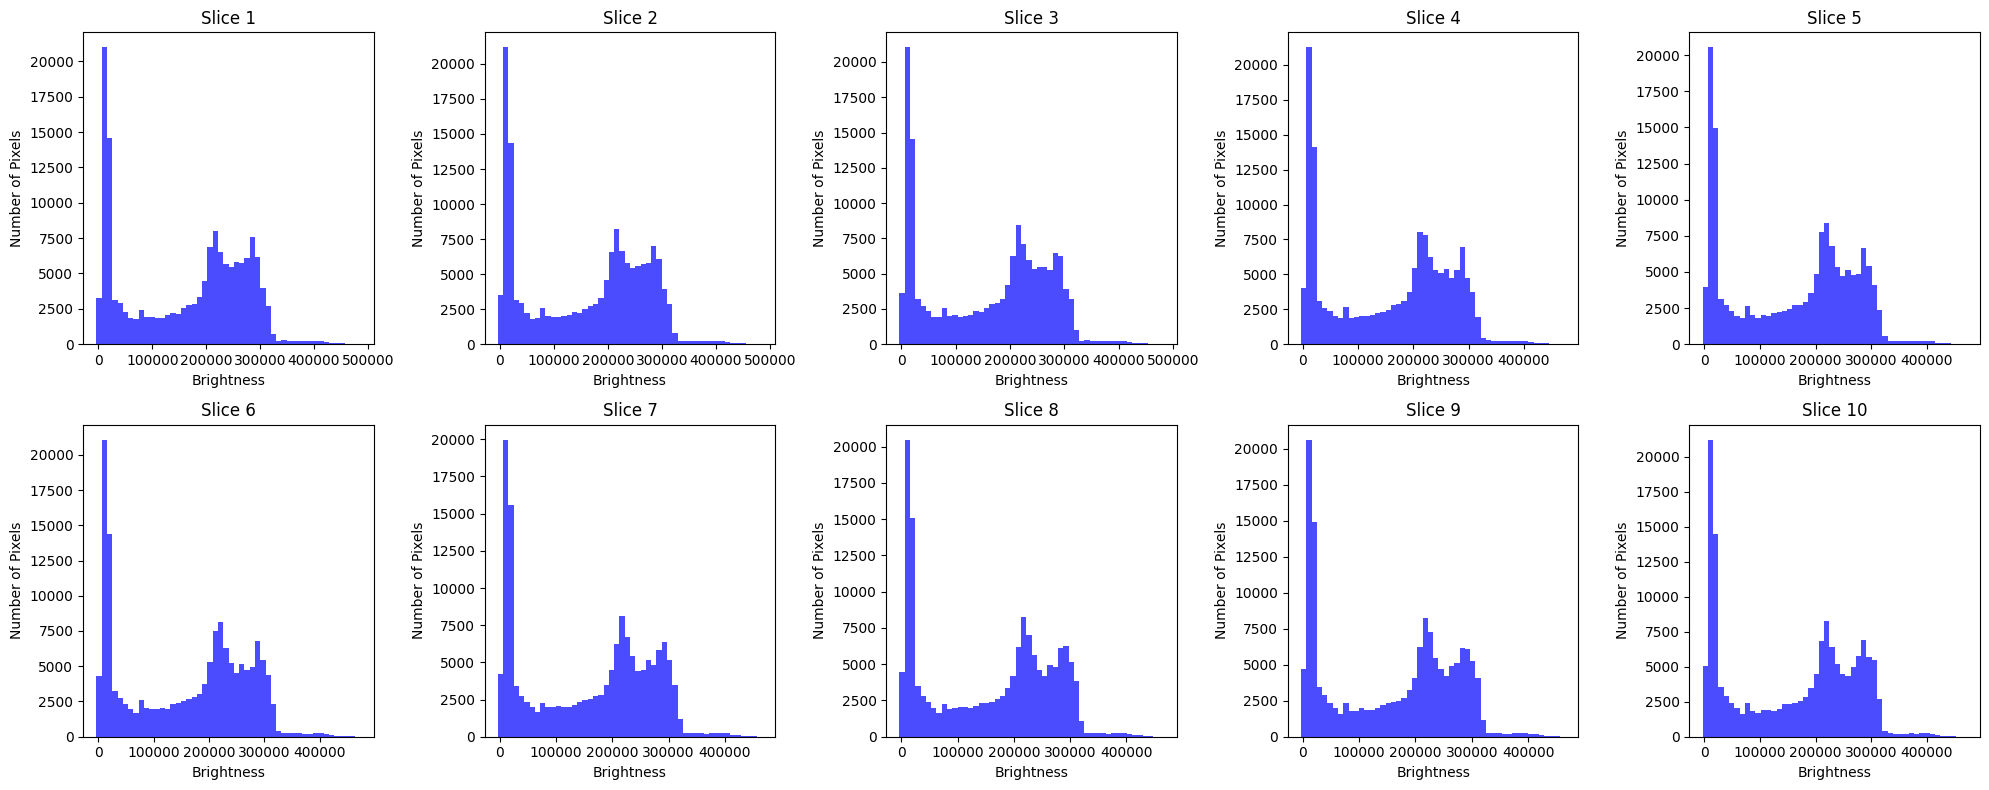

In [32]:
#Displaying the Histogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # Adjusting figsize for 5 images per row
for i in range(num_slices):
    row_idx = i // 5
    col_idx = i % 5
    
    hist, bins = np.histogram(T1[:, :, i].flatten(), bins=50)
    # Plotting histogram
    axs[row_idx, col_idx].bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='blue', alpha=0.7)
    axs[row_idx, col_idx].set_title('Slice {}'.format(i+1))
    axs[row_idx, col_idx].set_xlabel('Brightness')
    axs[row_idx, col_idx].set_ylabel('Number of Pixels')
plt.tight_layout()
plt.show()     

In [33]:
# Normalizing pixel values to the range of 0 to 255
for i in range(num_slices):
    slice_data = T1[:, :, i]
    min_val = np.min(slice_data)
    max_val = np.max(slice_data)
    print("Slice {}: Min = {}, Max = {}".format(i + 1, min_val, max_val))  
T1_normalized = np.interp(T1, (np.min(T1), np.max(T1)), (0, 255)).astype(np.uint8)
#Checking minimum and maximum pixel values again after normalization
for i in range(num_slices):
    slice_data = T1_normalized[:, :, i]
    min_val = np.min(slice_data)
    max_val = np.max(slice_data)
    print("Normalized Slice {}: Min = {}, Max = {}".format(i + 1, min_val, max_val))  

Slice 1: Min = 958.6986694335938, Max = 491434.28125
Slice 2: Min = 1049.649169921875, Max = 490571.4375
Slice 3: Min = 1134.3375244140625, Max = 487678.5625
Slice 4: Min = 1507.3309326171875, Max = 479884.25
Slice 5: Min = 1233.9344482421875, Max = 477069.3125
Slice 6: Min = 1404.7088623046875, Max = 478396.4375
Slice 7: Min = 1238.5146484375, Max = 471186.8125
Slice 8: Min = 1330.284423828125, Max = 470935.5625
Slice 9: Min = 1360.5609130859375, Max = 470580.0
Slice 10: Min = 1278.75830078125, Max = 477201.03125
Normalized Slice 1: Min = 0, Max = 255
Normalized Slice 2: Min = 0, Max = 254
Normalized Slice 3: Min = 0, Max = 253
Normalized Slice 4: Min = 0, Max = 248
Normalized Slice 5: Min = 0, Max = 247
Normalized Slice 6: Min = 0, Max = 248
Normalized Slice 7: Min = 0, Max = 244
Normalized Slice 8: Min = 0, Max = 244
Normalized Slice 9: Min = 0, Max = 244
Normalized Slice 10: Min = 0, Max = 247


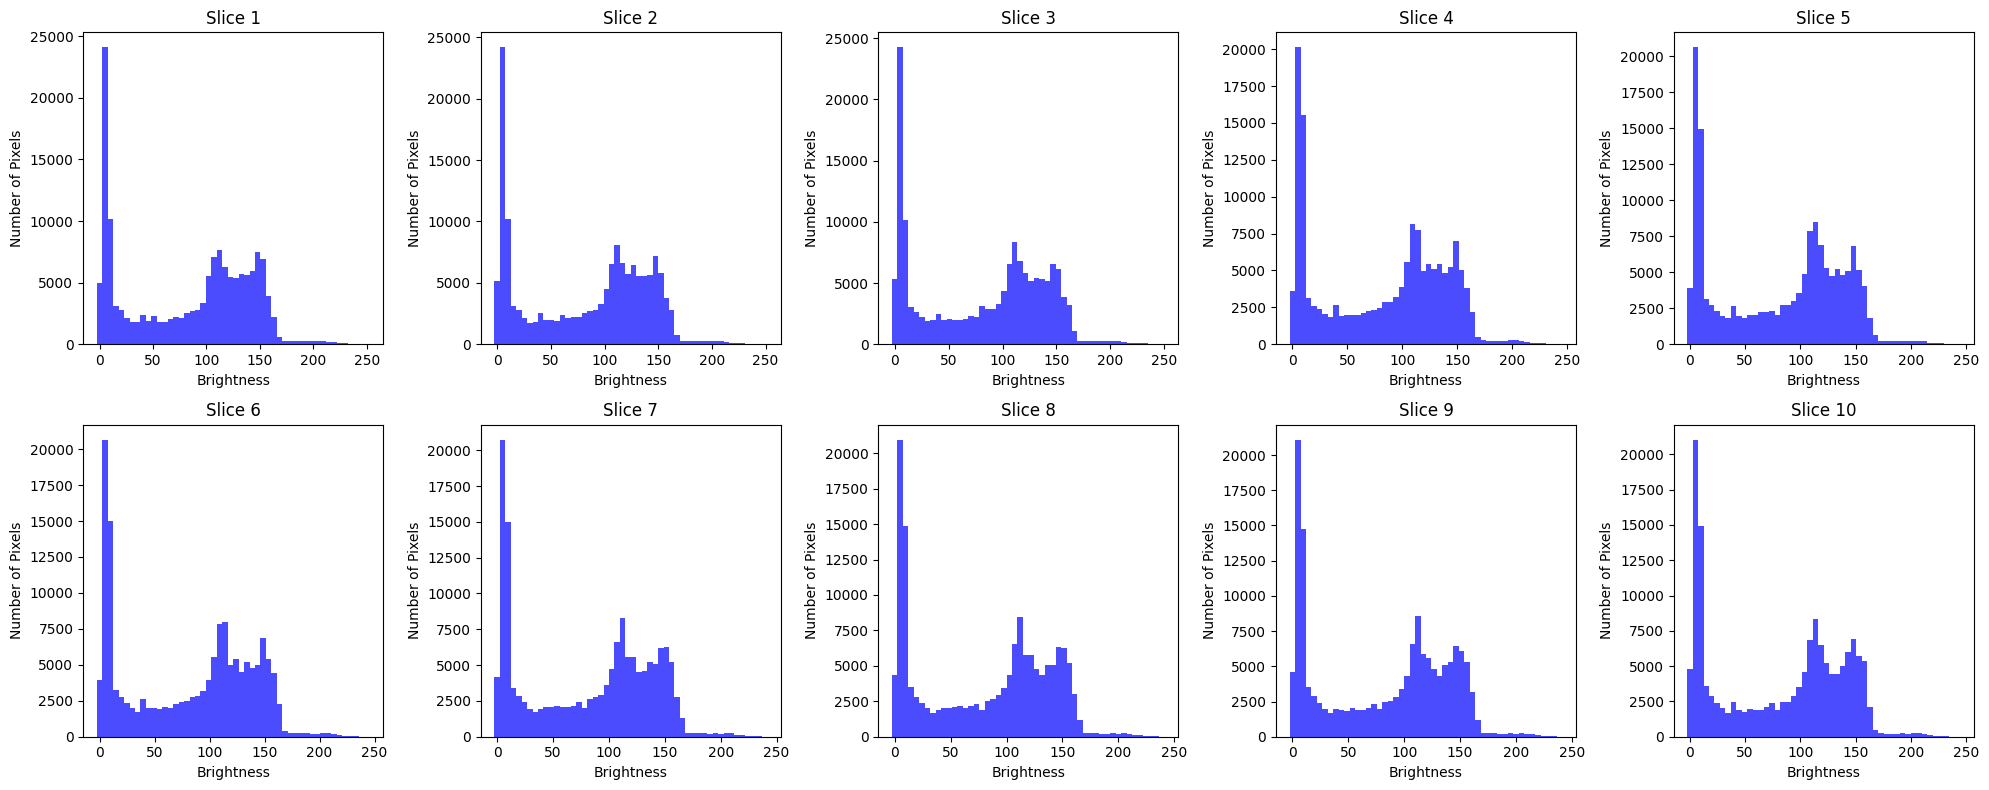

In [34]:
#Displaying the Histogram again
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  #Commented out so that the full code can fit into 5 pages
for i in range(num_slices):
    row_idx = i // 5
    col_idx = i % 5
    hist, bins = np.histogram(T1_normalized[:, :, i].flatten(), bins=50)
    # Plotting the updated histogram
    axs[row_idx, col_idx].bar(bins[:-1], hist, width=(bins[1]-bins[0]), color='blue', alpha=0.7)
    axs[row_idx, col_idx].set_title('Slice {}'.format(i+1))
    axs[row_idx, col_idx].set_xlabel('Brightness')
    axs[row_idx, col_idx].set_ylabel('Number of Pixels')
plt.tight_layout()
plt.show()

In [35]:
# Normalizing pixel values of the label data to the range of 0 to 255
for i in range(num_slices):
    slice_data = label[:, :, i]
    min_val = np.min(slice_data)
    max_val = np.max(slice_data)
    print("Slice {}: Min = {}, Max = {}".format(i + 1, min_val, max_val))
label_normalized = np.interp(T1, (np.min(T1), np.max(T1)), (0, 255)).astype(np.uint8)
# Checking minimum and maximum pixel values again after normalization
for i in range(num_slices):
    slice_data = T1_normalized[:, :, i]
    min_val = np.min(slice_data)
    max_val = np.max(slice_data)                
    print("Normalized Slice {}: Min = {}, Max = {}".format(i + 1, min_val, max_val))

Slice 1: Min = 0, Max = 5
Slice 2: Min = 0, Max = 5
Slice 3: Min = 0, Max = 5
Slice 4: Min = 0, Max = 5
Slice 5: Min = 0, Max = 5
Slice 6: Min = 0, Max = 5
Slice 7: Min = 0, Max = 5
Slice 8: Min = 0, Max = 5
Slice 9: Min = 0, Max = 5
Slice 10: Min = 0, Max = 5
Normalized Slice 1: Min = 0, Max = 255
Normalized Slice 2: Min = 0, Max = 254
Normalized Slice 3: Min = 0, Max = 253
Normalized Slice 4: Min = 0, Max = 248
Normalized Slice 5: Min = 0, Max = 247
Normalized Slice 6: Min = 0, Max = 248
Normalized Slice 7: Min = 0, Max = 244
Normalized Slice 8: Min = 0, Max = 244
Normalized Slice 9: Min = 0, Max = 244
Normalized Slice 10: Min = 0, Max = 247


# Thresholding Approaches

In [36]:
#Applying Interactive Thresholding method 
def interactive_thresholding(slice_index, threshold):
    image = T1_normalized[:, :, slice_index]
    segmented_image1 = np.zeros_like(image, dtype=np.uint8)
    segmented_image1[image >= threshold] = 255
    plt.figure(figsize=(3, 3))
    plt.imshow(segmented_image1, cmap='gray')            
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
slice_slider = IntSlider(min=0, max=num_slices-1, step=1, value=0, description='Slice Index:')
threshold_slider = IntSlider(min=0, max=255, step=1, value=115, description='Threshold:')
interact(interactive_thresholding, slice_index=slice_slider, threshold=threshold_slider);

interactive(children=(IntSlider(value=0, description='Slice Index:', max=9), IntSlider(value=115, description=…

In [37]:
# Applying Otsu's thresholding 
segmented_images = []
otsu = np.zeros_like(T1_normalized, dtype=np.uint8)
for i in range(10):
    image = T1_normalized[:, :, i].astype(np.uint8)  
    _, segmented_image2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    segmented_images.append(segmented_image2)
    otsu[:,:,i] = segmented_image2
# Displaying original and segmented images for each slice
plt.figure(figsize=(22, 8))
for i in range(num_slices):
    plt.subplot(2, 10, i + 1)                       #Commented out so that the full code can fit into 5 pages
    plt.imshow(T1_normalized[:, :, i], cmap='gray')
    plt.title('Original Slice {}'.format(i + 1))
    plt.axis('off')
    plt.subplot(2, 10, i + num_slices + 1)
    plt.imshow(segmented_images[i], cmap='gray')
    plt.title('Segmented Slice {}'.format(i + 1))
    plt.axis('off')
plt.show()

In [38]:
#Applying Adaptive Thresholding technique
adaptive = np.zeros_like(T1_normalized, dtype=np.uint8)
segment_images = []
for i in range(T1.shape[2]):
    image = T1_normalized[:, :, i].astype(np.uint8)  # Convert to uint8 for OpenCV
    # Applying adaptive thresholding
    segmented_image3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    # Adding the segmented image to the list
    adaptive[:,:,i] = segmented_image3
    segment_images.append(segmented_image3) 
# Displaying segmented images for each slice
plt.figure(figsize=(22, 8))
for i in range(10):                 
    plt.subplot(1, 10, i + 1)
    plt.imshow(segment_images[i], cmap='gray')
    plt.title('Segmented Slice {}'.format(i + 1))
    plt.axis('off')
plt.show()

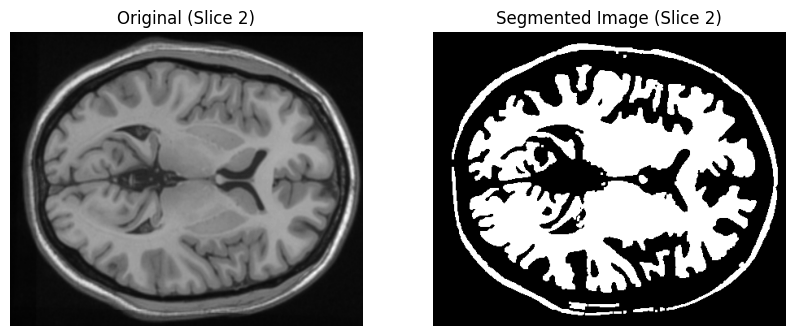

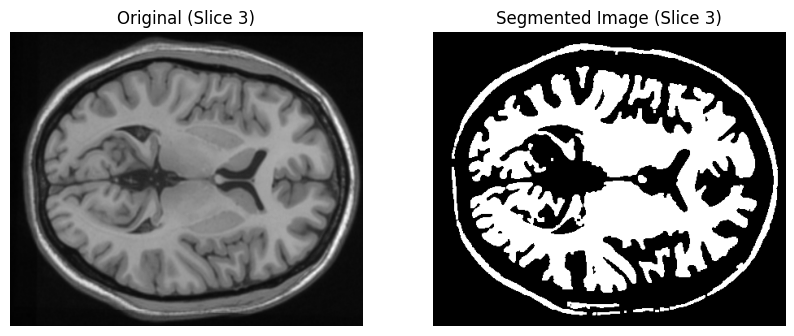

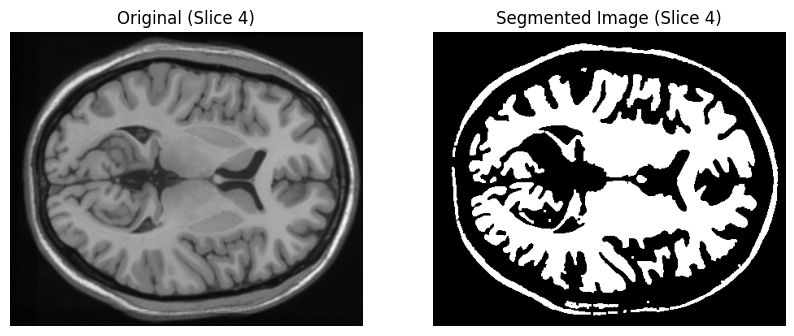

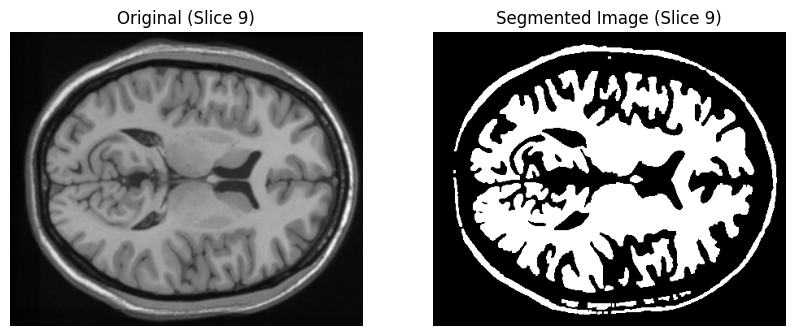

In [39]:
#Combining binary Thresholding and Mathematical Morphology
def morphological_segmentation(image, threshold, erosion_kernel_size, dilation_kernel_size):
    # Applying binary thresholding
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    # Defining structuring elements for erosion and dilation
    erosion_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (erosion_kernel_size, erosion_kernel_size))
    dilation_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (dilation_kernel_size, dilation_kernel_size))
    # Applying morphological erosion and dilation
    eroded_image = cv2.erode(binary_image, erosion_kernel)
    dilated_image = cv2.dilate(eroded_image, dilation_kernel)
    return dilated_image
threshold = 115  # Threshold value for binary thresholding
erosion_kernel_size = 3  # Size of the structuring element for erosion
dilation_kernel_size = 3  # Size of the structuring element for dilation
# Iterating over each slice 
num_slices = T1.shape[2]
    
for slice_index in range(num_slices):
    # Applying morphological segmentation on each slice
    image = T1_normalized[:, :, slice_index]
    segmented_image4 = morphological_segmentation(image, threshold, erosion_kernel_size, dilation_kernel_size)
    # Displaying the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)                            #Commented out so that the full code can fit into 5 pages
    plt.imshow(image, cmap='gray')
    plt.title('Original (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image4, cmap='gray')
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [40]:
#Combining binary Thresholding with Otsu's threshold and Mathematical Morphology to identify multiple regions 
binary_images = []
for i in range(10):
    image = T1_normalized[:, :, i].astype(np.uint8)  
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_images.append(binary_image)
segmented_images = []
for binary_image in binary_images:
    # Applying erosion and dilation
    opened_image = morphology.binary_opening(binary_image, morphology.disk(3))
    dilated_image = morphology.binary_dilation(opened_image, morphology.disk(3))
    # Label connected components to identify distinct regions
    labels = measure.label(dilated_image, connectivity=2)
    # Adding the segmented image to the list
    segmented_images.append(labels)
# Displaying original and segmented images for each slice
num_slices = len(segmented_images)
plt.figure(figsize=(22, 8))
for i in range(num_slices):            #Commented out so that the full code can fit into 5 pages
    plt.subplot(1, num_slices, i + 1)
    plt.imshow(segmented_images[i], cmap='jet')
    plt.title('Segmented Slice {}'.format(i + 1))
    plt.axis('off')
plt.show()

In [41]:
#Applying an extended version of Interactive Thresholding to identify 5 tissue layers
def interactive_thresholding(slice_index, threshold1, threshold2, threshold3, threshold4, threshold5):
    image = T1_normalized[:, :, slice_index]
    segmented_image5 = np.zeros_like(image, dtype=np.uint8)
    segmented_image5[(image >= threshold1) & (image < threshold2)] = 50
    segmented_image5[(image >= threshold2) & (image < threshold3)] = 100
    segmented_image5[(image >= threshold3) & (image < threshold4)] = 150
    segmented_image5[(image >= threshold4) & (image < threshold5)] = 200
    segmented_image5[image >= threshold5] = 255
    plt.figure(figsize=(2, 2))        #Commented out so that the full code can fit into 5 pages
    plt.imshow(segmented_image5, cmap='jet')  
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
slice_slider = IntSlider(min=0, max=num_slices-1, step=1, value=0, description='Slice Index:') #This slider helps to see the result on each slice
threshold1_slider = IntSlider(min=0, max=255, step=1, value=15, description='Threshold 1:')
threshold2_slider = IntSlider(min=0, max=255, step=1, value=27, description='Threshold 2:')
threshold3_slider = IntSlider(min=0, max=255, step=1, value=40, description='Threshold 3:')
threshold4_slider = IntSlider(min=0, max=255, step=1, value=90, description='Threshold 4:')
threshold5_slider = IntSlider(min=0, max=255, step=1, value=130, description='Threshold 5:')
interact(interactive_thresholding, slice_index=slice_slider, threshold1=threshold1_slider, threshold2=threshold2_slider, threshold3=threshold3_slider, threshold4=threshold4_slider, threshold5=threshold5_slider);

interactive(children=(IntSlider(value=0, description='Slice Index:', max=9), IntSlider(value=15, description='…

interactive(children=(IntSlider(value=0, description='Slice Index:', max=9), IntSlider(value=15, description='…

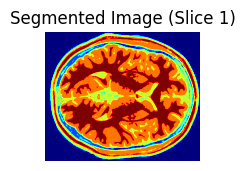

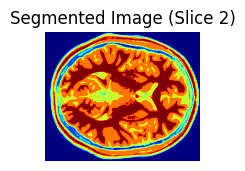

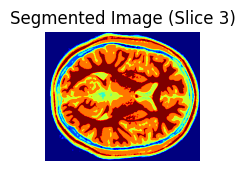

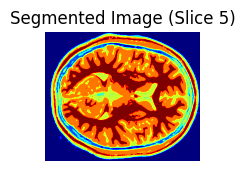

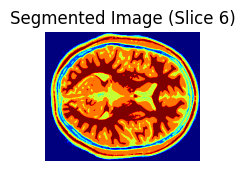

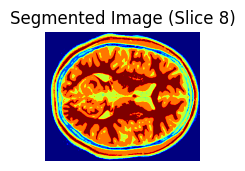

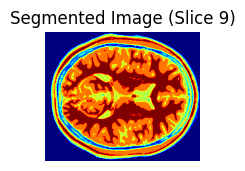

In [42]:
#Combining Interactive Thresholding with Mathematical Morphology
morphology_interactive = np.zeros_like(T1_normalized, dtype=np.uint8)
def interactive_segmentation(slice_index, threshold1, threshold2, threshold3, threshold4, threshold5):
    image = T1_normalized[:, :, slice_index] 
    # Applying thresholding to segment 5 regions
    segmented_image6 = np.zeros_like(image, dtype=np.uint8)
    segmented_image6[(image >= threshold1) & (image < threshold2)] = 50
    segmented_image6[(image >= threshold2) & (image < threshold3)] = 100
    segmented_image6[(image >= threshold3) & (image < threshold4)] = 150
    segmented_image6[(image >= threshold4) & (image < threshold5)] = 200
    segmented_image6[image >= threshold5] = 255
    # Defining kernel for morphological operations
    kernel = np.ones((3, 3), np.uint8)
    erosion_size = 2
    dilation_size = 2
    # Applying erosion and dilation using OpenCV
    eroded_image = cv2.erode(segmented_image6, kernel, iterations=erosion_size)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=dilation_size)
    morphology_interactive[:, :, slice_index] = dilated_image
    # Displaying the segmented image
    plt.figure(figsize=(2, 2))              #Commented out so that the full code can fit into 5 pages
    plt.imshow(dilated_image, cmap='jet')
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
# Sliders for interactive thresholding
slice_slider = IntSlider(min=0, max=num_slices-1, step=1, value=0, description='Slice Index:')
threshold1_slider = IntSlider(min=0, max=255, step=1, value=15, description='Threshold 1:')
threshold2_slider = IntSlider(min=0, max=255, step=1, value=27, description='Threshold 2:')
threshold3_slider = IntSlider(min=0, max=255, step=1, value=40, description='Threshold 3:')
threshold4_slider = IntSlider(min=0, max=255, step=1, value=90, description='Threshold 4:')
threshold5_slider = IntSlider(min=0, max=255, step=1, value=137, description='Threshold 5:')
# Interactive function
interact(interactive_segmentation, slice_index=slice_slider, threshold1=threshold1_slider, threshold2=threshold2_slider, 
         threshold3=threshold3_slider, threshold4=threshold4_slider, threshold5=threshold5_slider);
for slice_index in range(10):
    interactive_thresholding(slice_index, threshold1=15, threshold2=27, threshold3=40, threshold4=90, threshold5=137)


# Edge-based Segmentation 

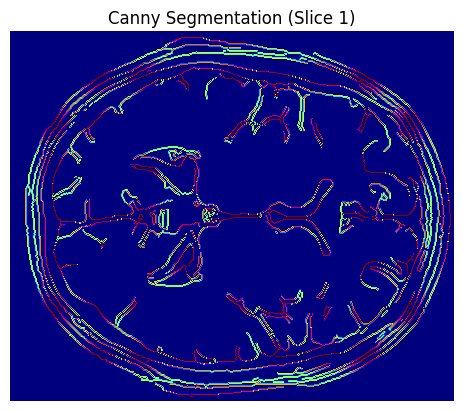

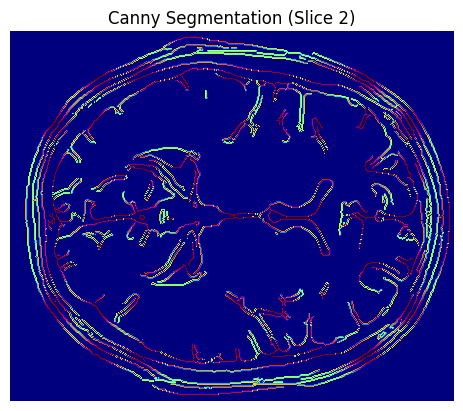

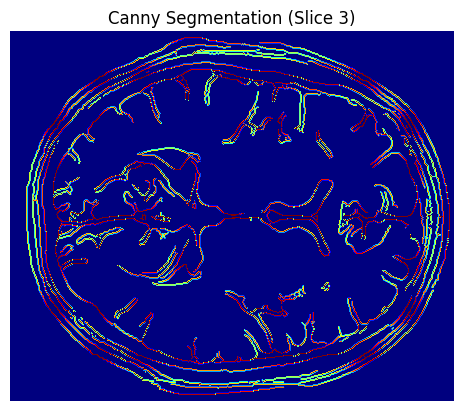

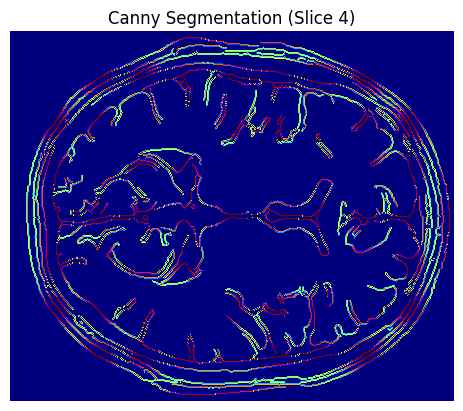

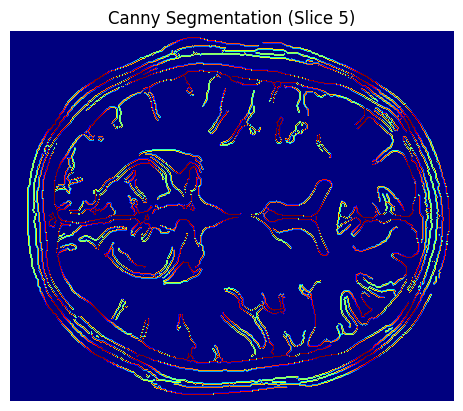

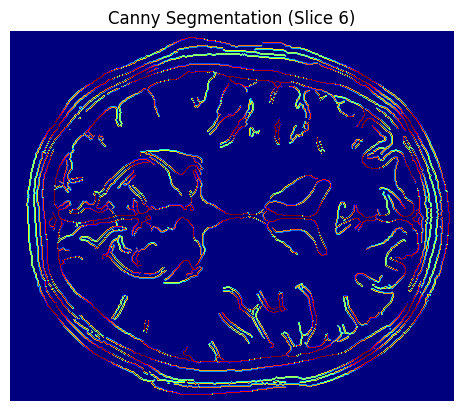

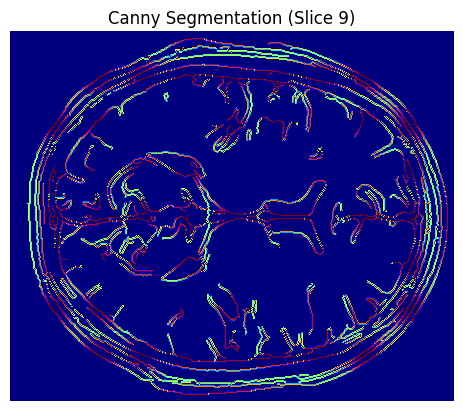

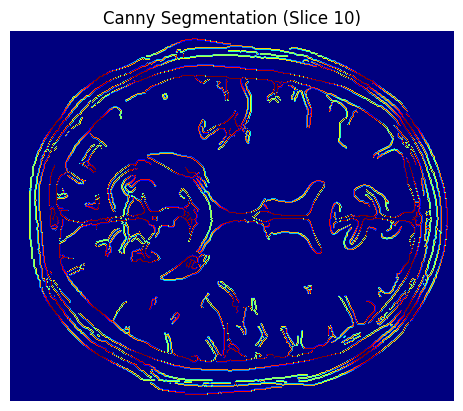

In [50]:
def canny_edge(slice_index, low_threshold=50, high_threshold=150):
    image = T1_normalized[:, :, slice_index].astype(np.uint8)  
    # Applying Canny edge detection
    edges = cv2.Canny(image, low_threshold, high_threshold)
    # Display the segmented image            
    plt.imshow(edges, cmap='jet')
    plt.title('Canny Segmentation (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
# Specifying the slice index and Canny parameters
slice_index = 0
low_threshold = 50
high_threshold = 150
# Applying Canny edge detection and displaying the segmented image for each slice
for slice_index in range(T1.shape[2]):
    canny_edge(slice_index, low_threshold, high_threshold)

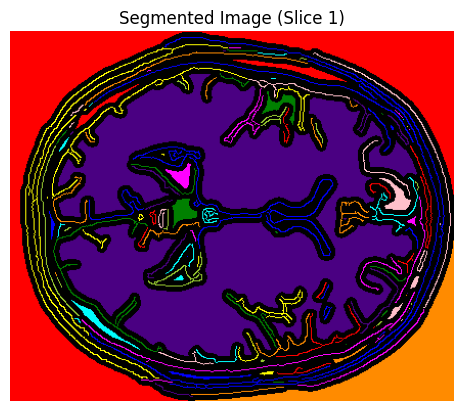

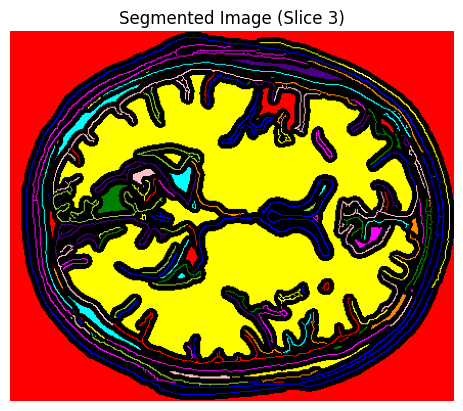

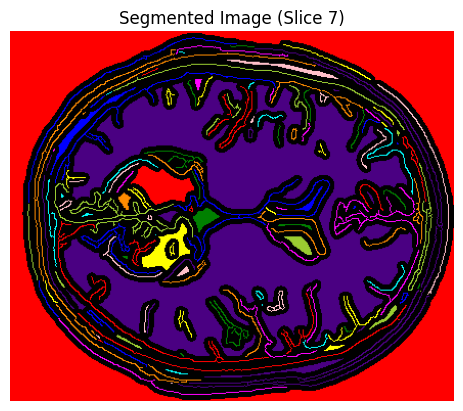

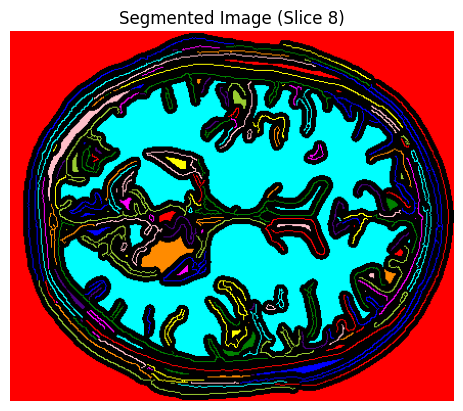

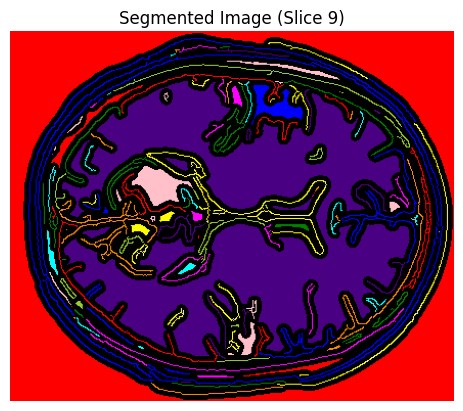

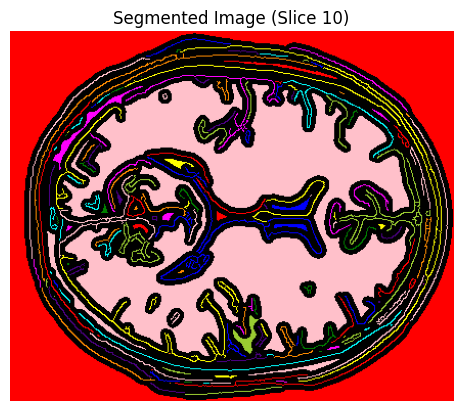

In [62]:
#Combining Canny edge detection with adaptive thresholding technique
canny_adaptive = np.zeros((362, 434, 3, 10), dtype=np.uint8)
def segment_regions(slice_index):
    image = T1_normalized[:, :, slice_index].astype(np.uint8)  
    # Applying Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Applying adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # Using connected component labeling to segment the binary image into regions
    labeled_image = measure.label(adaptive_threshold, connectivity=2)
    # Generating distinct colors for each labeled region
    colored_regions = label2rgb(labeled_image, bg_label=0)
    #canny_adaptive[:,:,slice_index] = colored_regions
    # Displaying the segmented image          
    plt.imshow(colored_regions)
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
    return colored_regions
# Applying segmentation for each slice
for slice_index in range(10):
    canny_adaptive[:, :, :, slice_index] = segment_regions(slice_index)

interactive(children=(IntSlider(value=0, description='Slice Index:', max=9), IntSlider(value=15, description='…

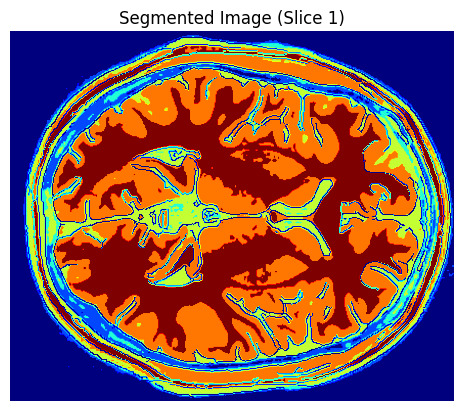

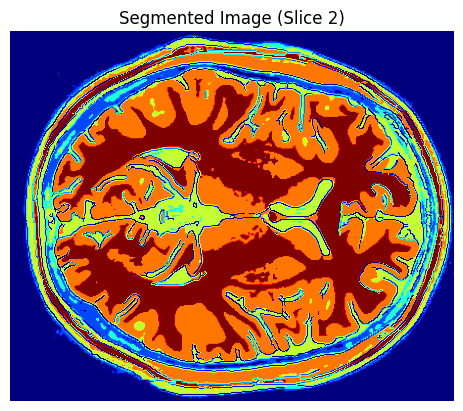

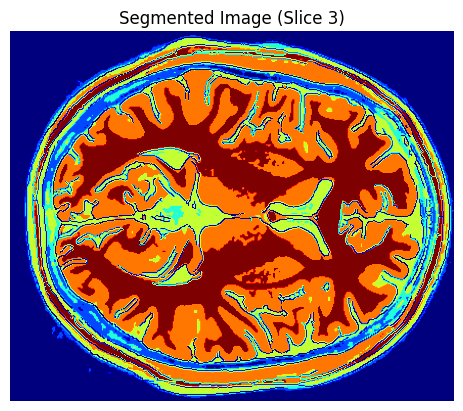

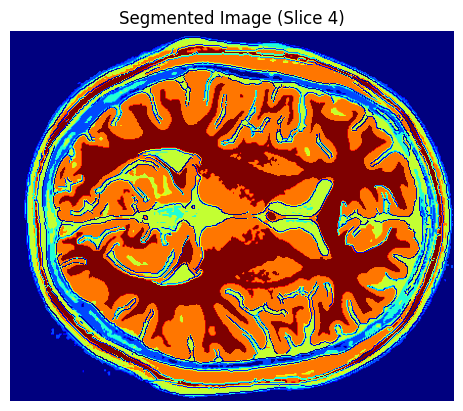

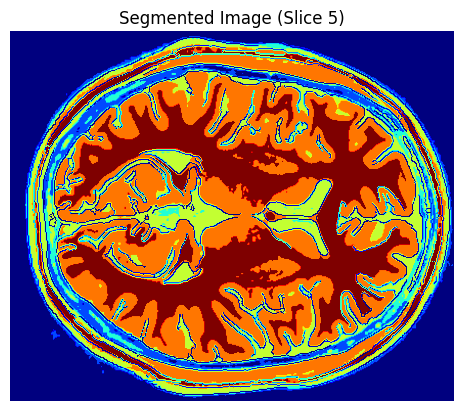

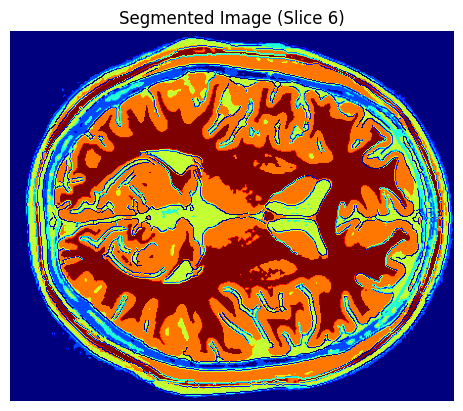

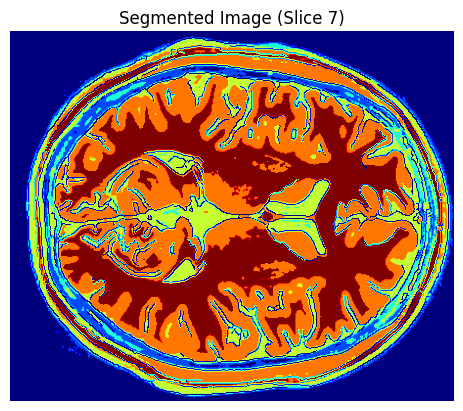

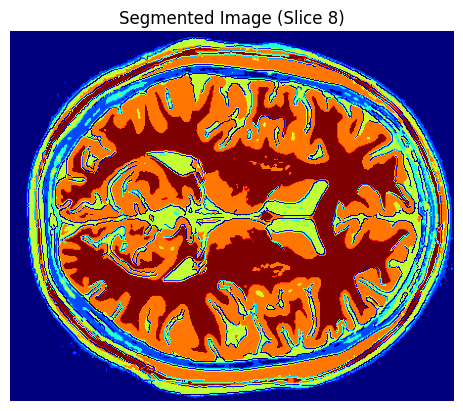

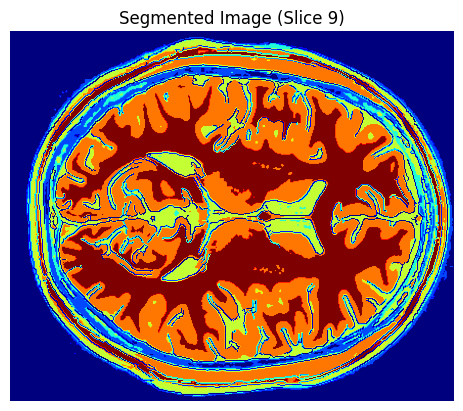

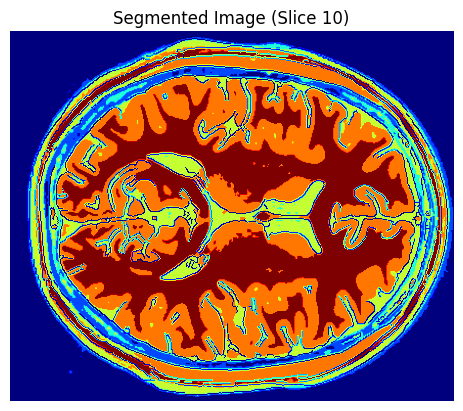

In [63]:
#Combining Canny edge detection with interactive thresholding for 5 regions
canny_interactive = np.zeros_like(T1_normalized, dtype=np.uint8)
def interactive_thresholding(slice_index, threshold1, threshold2, threshold3, threshold4, threshold5):
    image = T1_normalized[:, :, slice_index].astype(np.uint8)  # Convert to uint8 for OpenCV
    # Applying Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Applying interactive thresholding to segment into 5 regions
    segmented_image7 = np.zeros_like(image, dtype=np.uint8)
    segmented_image7[(edges == 0) & (image >= threshold1) & (image < threshold2)] = 50
    segmented_image7[(edges == 0) & (image >= threshold2) & (image < threshold3)] = 100
    segmented_image7[(edges == 0) & (image >= threshold3) & (image < threshold4)] = 150
    segmented_image7[(edges == 0) & (image >= threshold4) & (image < threshold5)] = 200
    segmented_image7[(edges == 0) & (image >= threshold5)] = 255
    canny_interactive[:, :, slice_index] = segmented_image7
    # Displaying the segmented image
    plt.imshow(segmented_image7, cmap='jet')
    plt.title('Segmented Image (Slice {})'.format(slice_index + 1))
    plt.axis('off')
    plt.show()
# Creating interactive sliders for threshold values
slice_slider = IntSlider(min=0, max=T1.shape[2] - 1, step=1, value=0, description='Slice Index:')
threshold1_slider = IntSlider(min=0, max=255, step=1, value=15, description='Threshold 1:')
threshold2_slider = IntSlider(min=0, max=255, step=1, value=27, description='Threshold 2:')
threshold3_slider = IntSlider(min=0, max=255, step=1, value=40, description='Threshold 3:')
threshold4_slider = IntSlider(min=0, max=255, step=1, value=90, description='Threshold 4:')
threshold5_slider = IntSlider(min=0, max=255, step=1, value=137, description='Threshold 5:')
# Creating interactive visualization
interact(interactive_thresholding, slice_index=slice_slider,
         threshold1=threshold1_slider, threshold2=threshold2_slider,
         threshold3=threshold3_slider, threshold4=threshold4_slider, 
         threshold5=threshold5_slider);
for slice_index in range(10):
    interactive_thresholding(slice_index, threshold1=15, threshold2=27, threshold3=40, threshold4=90, threshold5=137)

# Task 2

# Evaluating performance of Otsu Thresholding technique

In [64]:
def calculate_pixelaccuracy(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmentedbinary = (segmented_image > t1).astype(np.uint8)  
    groundtruth_binary = (ground_truth > t2).astype(np.uint8)  
    # Calculating the number of matching pixels
    matchingpixels = np.sum(segmentedbinary == groundtruth_binary)
    # Calculating total pixels
    totalpixels = segmentedbinary.size
    # Calculating accuracy
    accuracy = matchingpixels / totalpixels
    return accuracy
groundtruth = np.array(label_normalized)
segmentedimage = np.array(otsu)
print(groundtruth.shape)
print(segmentedimage.shape)
pixel_accuracy = []
for segmented_image, ground_truth in zip(segmentedimage, groundtruth):
    accuracy = calculate_pixelaccuracy(segmented_image, ground_truth, t1=0.5, t2= 0.5)
    pixel_accuracy.append(accuracy)
print("Pixel accuracy :", np.mean(pixel_accuracy))

(362, 434, 10)
(362, 434, 10)
Pixel accuracy : 0.5778038037528324


# Evaluating performance of Adaptive Thresholding technique

In [607]:
def calculate_pixelaccuracy(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmentedbinary = (segmented_image > t1).astype(np.uint8)  
    groundtruth_binary = (ground_truth > t2).astype(np.uint8)  
    # Calculating the number of matching pixels
    matchingpixels = np.sum(segmentedbinary == groundtruth_binary)
    # Calculating total pixels
    totalpixels = segmentedbinary.size
    # Calculating accuracy
    accuracy = matchingpixels / totalpixels
    return accuracy
groundtruth = np.array(label_normalized)
segmentedimage = np.array(adaptive)
print(groundtruth.shape)
print(segmentedimage.shape)
pixel_accuracy = []
for segmented_image, ground_truth in zip(segmentedimage, groundtruth):
    accuracy = calculate_pixelaccuracy(segmented_image, ground_truth, t1=0.5, t2= 0.5)
    pixel_accuracy.append(accuracy)  
print("Pixel accuracy :", np.mean(pixel_accuracy))

(362, 434, 10)
(362, 434, 10)
Pixel accuracy : 0.6607041016370904


# Evaluating performance of Combined Canny edge detection with interactive thresholding approach

In [572]:
def calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)  
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)  
    # Calculating the number of matching pixels
    matching_pixels = np.sum(segmented_binary == ground_truth_binary)
    # Calculating total pixels
    total_pixels = segmented_binary.size
    # Calculating accuracy
    accuracy = matching_pixels / total_pixels
    return accuracy
ground_truth = np.array(label_normalized)
segmented_image = np.array(canny_interactive)
print(ground_truth.shape)
print(segmented_image.shape)
pixel_accuracy = []
for segmented_image, ground_truth in zip(segmented_image, ground_truth):
    accuracy = calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2= 0.5)
    pixel_accuracy.append(accuracy)
print("Pixel accuracy of Combined Canny edge detection with interactive thresholding approach:", np.mean(pixel_accuracy))

(362, 434, 10)
(362, 434, 10)
Pixel accuracy of Combined Canny edge detection with interactive thresholding approach: 0.6715514168597397


In [573]:
def calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum(segmented_binary) + np.sum(ground_truth_binary)
    # Calculating the Dice coefficient
    dice_coefficient = (2.0 * intersection) / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return dice_coefficient
ground_truth = np.array(label_normalized)
segmented_image = np.array(canny_interactive)
print("Shape of ground truth array:", ground_truth.shape)
print("Shape of segmented images array:", segmented_image.shape)
dice_coefficients = []
for segmented_image, ground_truth in zip(segmented_image, ground_truth):
    dice = calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5)
    dice_coefficients.append(dice)
mean_dice_coefficient = np.mean(dice_coefficients)
print("Mean Dice coefficient:", mean_dice_coefficient)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Dice coefficient: 0.7719813484605641


In [574]:
def calculate_iou(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum((segmented_binary + ground_truth_binary) > 0)
    # Calculating the Jaccard Index (IoU)
    iou = intersection / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return iou
ground_truth = np.array(label_normalized)
segmented_images = np.array(canny_interactive)
print("Shape of ground truth array:", ground_truth.shape)
print("Shape of segmented images array:", segmented_images.shape)
iou_scores = []
for segmented_image, gt_image in zip(segmented_images, ground_truth):
    iou = calculate_iou(segmented_image, gt_image, t1=0.5, t2=0.5)
    iou_scores.append(iou)
mean_iou_score = np.mean(iou_scores)
print("Mean Jaccard Index (IoU):", mean_iou_score)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Jaccard Index (IoU): 0.6702175927608373


# Evaluating performance of Combined Interactive Thresholding with Mathematical Morphology

In [505]:
def calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)  
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the number of matching pixels
    matching_pixels = np.sum(segmented_binary == ground_truth_binary)
    # Calculating total pixels
    total_pixels = segmented_binary.size
    # Calculating accuracy
    accuracy = matching_pixels / total_pixels
    return accuracy
ground_truth = np.array(label_normalized)
segmented_image = np.array(morphology_interactive)
print(ground_truth.shape)
print(segmented_image.shape)
pixel_accuracy = []
for segmented_image, ground_truth in zip(segmented_image, ground_truth):
    accuracy = calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2= 0.5)
    pixel_accuracy.append(accuracy)
print("Pixel accuracy of Combined Mathematical Morphology with interactive thresholding approach:", np.mean(pixel_accuracy))

(362, 434, 10)
(362, 434, 10)
Pixel accuracy of Combined Mathematical Morphology with interactive thresholding approach: 0.0766861012806477


In [507]:
def calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum(segmented_binary) + np.sum(ground_truth_binary)
    # Calculating the Dice coefficient
    dice_coefficient = (2.0 * intersection) / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return dice_coefficient
ground_truth = np.array(label_normalized)
segmented_image = np.array(morphology_interactive)
print("Shape of ground truth array:", ground_truth.shape)
print("Shape of segmented images array:", segmented_image.shape)
dice_coefficients = []
for segmented_image, ground_truth in zip(segmented_image, ground_truth):
    dice = calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5)
    dice_coefficients.append(dice)
mean_dice_coefficient = np.mean(dice_coefficients)
print("Mean Dice coefficient:", mean_dice_coefficient)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Dice coefficient: 0.13913475128831576


In [506]:
def calculate_iou(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum((segmented_binary + ground_truth_binary) > 0)
    # Calculating the Jaccard Index (IoU)
    iou = intersection / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return iou
ground_truth = np.array(label_normalized)
segmented_images = np.array(morphology_interactive)
print("Shape of ground truth array:", ground_truth.shape)
print("Shape of segmented images array:", segmented_images.shape)
iou_scores = []
for segmented_image, gt_image in zip(segmented_images, ground_truth):
    iou = calculate_iou(segmented_image, gt_image, t1=0.5, t2=0.5)
    iou_scores.append(iou)
mean_iou_score = np.mean(iou_scores)
print("Mean Jaccard Index (IoU):", mean_iou_score)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Jaccard Index (IoU): 0.07535202428160162


# Task 3

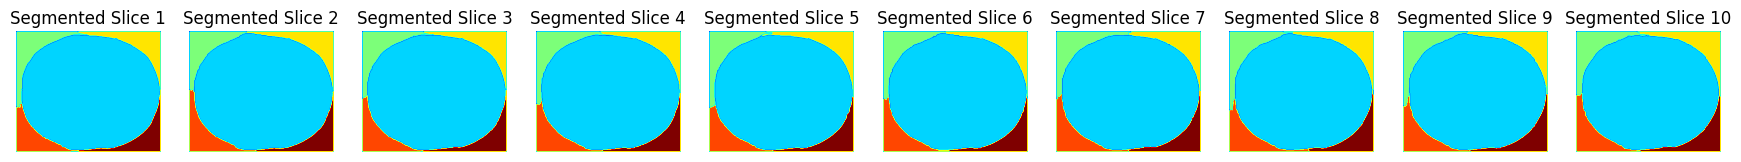

In [65]:
#Applying one of the advanced segmentation method, Watershed
segmented_slices = []
watershed = np.zeros_like(T1_normalized, dtype=np.uint8)
for i in range(10):  # Iterating over slice
    img = T1_normalized[:, :, i].astype(np.uint8)
    # Applying Gaussian blur
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    # Performing thresholding (you may need to adjust parameters)
    _, thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Performing morphological operations to remove noise and close gaps
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    # Applying distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(opening, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    # Adding one to all labels so that sure background is not 0, but 1
    markers = markers + 1
    # Marking unknown region with 0
    markers[unknown == 255] = 0
    # Applying watershed algorithm
    segmented = cv2.watershed(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), markers)
    # Adding the segmented slice to the list
    segmented_slices.append(segmented)
    watershed[:, :, i] = segmented
# Displaying segmented slices 
plt.figure(figsize=(22, 8))                      #Commented out so that the full code can fit into 5 pages
for i, segmented in enumerate(segmented_slices):
    plt.subplot(1, len(segmented_slices), i + 1)
    plt.imshow(segmented, cmap='jet')
    plt.title('Segmented Slice {}'.format(i + 1))
    plt.axis('off')
plt.show()

In [619]:
#Evaluation of Watershed
def calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)  
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)  
    # Calculating the number of matching pixels
    matching_pixels = np.sum(segmented_binary == ground_truth_binary)
    # Calculating total pixels
    total_pixels = segmented_binary.size
    # Calculating accuracy
    accuracy = matching_pixels / total_pixels
    return accuracy
gr_truth = np.array(label_normalized)
seg_image = np.array(watershed)
print(gr_truth.shape)
print(seg_image.shape)
pixel_accuracy = []
for segmented_image, ground_truth in zip(seg_image, gr_truth):
    accuracy = calculate_pixel_accuracy(segmented_image, ground_truth, t1=0.5, t2= 0.5)
    pixel_accuracy.append(accuracy)
print("Pixel accuracy :", np.mean(pixel_accuracy))

(362, 434, 10)
(362, 434, 10)
Pixel accuracy of Combined Canny edge detection with interactive thresholding approach: 0.9986658858874149


In [620]:
def calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum(segmented_binary) + np.sum(ground_truth_binary)
    # Calculating the Dice coefficient
    dice_coefficient = (2.0 * intersection) / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return dice_coefficient
gr_truth = np.array(label_normalized)
seg_image = np.array(watershed)
print("Shape of ground truth array:", gr_truth.shape)
print("Shape of segmented images array:", seg_image.shape)
dice_coefficients = []
for segmented_image, ground_truth in zip(seg_image, gr_truth):
    dice = calculate_dice_coefficient(segmented_image, ground_truth, t1=0.5, t2=0.5)
    dice_coefficients.append(dice)
mean_dice_coefficient = np.mean(dice_coefficients)
print("Mean Dice coefficient:", mean_dice_coefficient)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Dice coefficient: 0.9992396462117684


In [641]:
def calculate_iou(segmented_image, ground_truth, t1=0.5, t2=0.5):
    # Binarizing the segmented image and ground truth image
    segmented_binary = (segmented_image > t1).astype(np.uint8)
    ground_truth_binary = (ground_truth > t2).astype(np.uint8)
    # Calculating the intersection and union of the binary images
    intersection = np.sum(segmented_binary * ground_truth_binary)
    union = np.sum((segmented_binary + ground_truth_binary) > 0)
    # Calculating the Jaccard Index (IoU)
    iou = intersection / (union + 1e-9)  # Adding small epsilon to avoid division by zero
    return iou
gr_truth = np.array(label_normalized)
seg_image = np.array(watershed)
print("Shape of ground truth array:", gr_truth.shape)
print("Shape of segmented images array:", seg_image.shape)
iou_scores = []
for segmented_image, gt_image in zip(segmented_images, ground_truth):
    iou = calculate_iou(seg_image, gt_image, t1=0.5, t2=0.5)
    iou_scores.append(iou)
mean_iou_score = np.mean(iou_scores)
print("Mean Jaccard Index (IoU):", mean_iou_score)

Shape of ground truth array: (362, 434, 10)
Shape of segmented images array: (362, 434, 10)
Mean Jaccard Index (IoU): 0.9999999999999994
